# Machine Learning for NLP
*This project requires Python 3.9+*
### 1. Parsing and saving the data

In [19]:
from src.dataset_parser import parse_data_to_csv

raw_path = "./original_data"
parsed_path = "./parsed_data"
# parse_data_to_csv(raw_path, parsed_path) // DO NOT EXECUTE UNLESS PARSED DATA IS LOST, OR USE OTHER parsed_path

### 2. Loading parsed data & Dummy Classifier

In [20]:
from sklearn.dummy import DummyClassifier

from src.dataset import DataSet

ds = DataSet(parsed_path)
dummy_domain = DummyClassifier(strategy="most_frequent")
dummy_polarity = DummyClassifier(strategy="most_frequent")
dummy_rating_str = DummyClassifier(strategy="most_frequent")

#### Fitting Dummy classifier with training data

In [21]:
# print(ds.training, ds.training.dtypes)
dummy_domain.fit(ds.training["review_text"], ds.training["domain"])
dummy_polarity.fit(ds.training["review_text"], ds.training["polarity"])
dummy_rating_str.fit(ds.training["review_text"], ds.training["rating_str"].astype(str))  # column seems to automatically reconvert to float if not forced in str

DummyClassifier(strategy='most_frequent')

#### Predictions and scores with Dummy classifier

In [22]:
print(dummy_domain.predict(ds.testing["review_text"]))
print(dummy_polarity.predict(ds.testing["review_text"]))
print(dummy_rating_str.predict(ds.testing["review_text"]))

['books' 'books' 'books' ... 'books' 'books' 'books']
['negative' 'negative' 'negative' ... 'negative' 'negative' 'negative']
['5.0' '5.0' '5.0' ... '5.0' '5.0' '5.0']


In [23]:
print(dummy_domain.score(ds.testing["review_text"], ds.testing["domain"]))
print(dummy_polarity.score(ds.testing["review_text"], ds.testing["polarity"]))
print(dummy_rating_str.score(ds.testing["review_text"], ds.testing["rating_str"].astype(str)))

0.25
0.491875
0.355625


### 3. Example of Vectorizer

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer  # CountVectorizer will be used later

vectorizer = TfidfVectorizer(lowercase=True, analyzer="word")
X_training = vectorizer.fit_transform(ds.training["review_text"])
print(X_training.shape)
print(X_training.toarray())
print(vectorizer.get_params(), vectorizer.get_stop_words(), sep='\n')
X_testing = vectorizer.transform(ds.testing["review_text"])
print(X_testing.shape)
print(X_testing)

(6400, 35437)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{'analyzer': 'word', 'binary': False, 'decode_error': 'strict', 'dtype': <class 'numpy.float64'>, 'encoding': 'utf-8', 'input': 'content', 'lowercase': True, 'max_df': 1.0, 'max_features': None, 'min_df': 1, 'ngram_range': (1, 1), 'norm': 'l2', 'preprocessor': None, 'smooth_idf': True, 'stop_words': 'english', 'strip_accents': None, 'sublinear_tf': False, 'token_pattern': '(?u)\\b\\w\\w+\\b', 'tokenizer': None, 'use_idf': True, 'vocabulary': None}
frozenset({'everyone', 'side', 'anywhere', 'although', 'together', 'six', 'hundred', 'thence', 'therein', 'sometime', 'four', 'de', 'own', 'here', 'further', 'will', 'those', 'amount', 'should', 'top', 'amongst', 'third', 'front', 'thus', 'nowhere', 'fire', 'very', 'sixty', 'whence', 'behind', 'the', 'is', 'until', 'do', 'even', 'whereupon', 'why', 'each', 'nothing', 'interes

### 4. Example of Perceptron Classifier

In [25]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron(shuffle=False)
perceptron.fit(X_training, ds.training["polarity"])
perceptron.score(X_testing, ds.testing["polarity"])

0.776875

### 5. Preprocessing experiments

We are going to use 2 different vectorizer types: TF-IDF and Count.  
N-grams will be word based (= whitespace separated).  
We are going to try different n-grams lengths: 1 to 3.  

In [26]:
tfidf_unigram_vectorizer = TfidfVectorizer(lowercase=True, analyzer="word", ngram_range=(1, 1))
tfidf_bigram_vectorizer = TfidfVectorizer(lowercase=True, analyzer="word", ngram_range=(2, 2))
tfidf_trigram_vectorizer = TfidfVectorizer(lowercase=True, analyzer="word", ngram_range=(3, 3))

count_unigram_vectorizer = CountVectorizer(lowercase=True, analyzer="word", ngram_range=(1, 1))
count_bigram_vectorizer = CountVectorizer(lowercase=True, analyzer="word", ngram_range=(2, 2))
count_trigram_vectorizer = CountVectorizer(lowercase=True, analyzer="word", ngram_range=(3, 3))

In [27]:
from copy import deepcopy

base_perceptron = Perceptron()
tfidf_unigram_perceptron = deepcopy(base_perceptron)  # deepcopying avoids having to copy parameters between multiple initializations
tfidf_bigram_perceptron = deepcopy(base_perceptron)
tfidf_trigram_perceptron = deepcopy(base_perceptron)
count_unigram_perceptron = deepcopy(base_perceptron)
count_bigram_perceptron = deepcopy(base_perceptron)
count_trigram_perceptron = deepcopy(base_perceptron)

In [28]:
X_training_tfidf_unigram = tfidf_unigram_vectorizer.fit_transform(ds.training["review_text"], ds.training["polarity"])
X_testing_tfidf_unigram = tfidf_unigram_vectorizer.transform(ds.testing["review_text"])
X_training_tfidf_bigram = tfidf_bigram_vectorizer.fit_transform(ds.training["review_text"], ds.training["polarity"])
X_testing_tfidf_bigram = tfidf_bigram_vectorizer.transform(ds.testing["review_text"])
X_training_tfidf_trigram = tfidf_trigram_vectorizer.fit_transform(ds.training["review_text"], ds.training["polarity"])
X_testing_tfidf_trigram = tfidf_trigram_vectorizer.transform(ds.testing["review_text"])

X_training_count_unigram = count_unigram_vectorizer.fit_transform(ds.training["review_text"], ds.training["polarity"])
X_testing_count_unigram = count_unigram_vectorizer.transform(ds.testing["review_text"])
X_training_count_bigram = count_bigram_vectorizer.fit_transform(ds.training["review_text"], ds.training["polarity"])
X_testing_count_bigram = count_bigram_vectorizer.transform(ds.testing["review_text"])
X_training_count_trigram = count_trigram_vectorizer.fit_transform(ds.training["review_text"], ds.training["polarity"])
X_testing_count_trigram = count_trigram_vectorizer.transform(ds.testing["review_text"])

In [29]:
tfidf_unigram_perceptron.fit(X_training_tfidf_unigram, ds.training["polarity"])
tfidf_bigram_perceptron.fit(X_training_tfidf_bigram, ds.training["polarity"])
tfidf_trigram_perceptron.fit(X_training_tfidf_trigram, ds.training["polarity"])

count_unigram_perceptron.fit(X_training_count_unigram, ds.training["polarity"])
count_bigram_perceptron.fit(X_training_count_bigram, ds.training["polarity"])
count_trigram_perceptron.fit(X_training_count_trigram, ds.training["polarity"])

Perceptron()

In [30]:
from sklearn.metrics import precision_recall_fscore_support

s = "\t\t\tPrecision: {0:.9f}\tRecall: {1:.9f}\tF-Score: {2:.9f}"


def print_values(true_y, predicted_y, avg="macro"):
    values = precision_recall_fscore_support(true_y, predicted_y, average=avg)
    print(s.format(*values))
    return values


print("Macro average values:")

print("\tTFIDF vectorizer:")
print("\t\tUnigrams:")
print_values(ds.testing["polarity"], tfidf_unigram_perceptron.predict(X_testing_tfidf_unigram))
print("\t\tBigrams: ")
print_values(ds.testing["polarity"], tfidf_bigram_perceptron.predict(X_testing_tfidf_bigram))
print("\t\tTrigrams:")
print_values(ds.testing["polarity"], tfidf_trigram_perceptron.predict(X_testing_tfidf_trigram))
print()
print("\tCounter vectorizer:")
print("\t\tUnigrams:")
print_values(ds.testing["polarity"], count_unigram_perceptron.predict(X_testing_count_unigram))
print("\t\tBigrams: ")
print_values(ds.testing["polarity"], count_bigram_perceptron.predict(X_testing_count_bigram))
print("\t\tTrigrams:")
print_values(ds.testing["polarity"], count_trigram_perceptron.predict(X_testing_count_trigram))

Macro average values:
	TFIDF vectorizer:
		Unigrams:
			Precision: 0.793040078	Recall: 0.792831232	F-Score: 0.792488327
		Bigrams: 
			Precision: 0.796378917	Recall: 0.796419680	F-Score: 0.796248727
		Trigrams:
			Precision: 0.731622884	Recall: 0.731524418	F-Score: 0.731243281

	Counter vectorizer:
		Unigrams:
			Precision: 0.796292727	Recall: 0.795514753	F-Score: 0.794927904
		Bigrams: 
			Precision: 0.797490309	Recall: 0.797568420	F-Score: 0.797484495
		Trigrams:
			Precision: 0.716715543	Recall: 0.716561092	F-Score: 0.716234038


(0.7167155425219941, 0.7165610919133334, 0.7162340381646467, None)

It seems that both vectorizer types have similar behaviors. Trigrams are clearly less accurate than unigrams or bigrams, but the difference between those last two is much thinner.  
Apparently, bigrams work better than unigrams, although the delta is less than 1 or 2% in each vectorizer.

### 6. Perceptron

In [34]:
def perceptron_calc(domain, it=1000):
    vec = TfidfVectorizer(lowercase=True, analyzer="word")
    training = vec.fit_transform(ds.training_by_domain[domain]["review_text"])
    testing = vec.transform(ds.testing_by_domain[domain]['review_text'])
    percep = Perceptron(shuffle=False, max_iter=it)
    percep.fit(training, ds.training_by_domain[domain]["polarity"])
    percep.score(testing, ds.testing_by_domain[domain]["polarity"])
    print(s.format(*precision_recall_fscore_support(ds.testing_by_domain[domain]["polarity"], percep.predict(testing), average="macro")))

In [35]:
perceptron_calc('books', 100)
perceptron_calc('books', 1000)
perceptron_calc('books', 10000)
perceptron_calc('books', 100000)
perceptron_calc('books', 1000000)
perceptron_calc('books', 10000000)
perceptron_calc('books', 100000000)
perceptron_calc('books', 1000000000)

			Precision: 0.755208333	Recall: 0.754825483	F-Score: 0.754846779
			Precision: 0.755208333	Recall: 0.754825483	F-Score: 0.754846779
			Precision: 0.755208333	Recall: 0.754825483	F-Score: 0.754846779
			Precision: 0.755208333	Recall: 0.754825483	F-Score: 0.754846779
			Precision: 0.755208333	Recall: 0.754825483	F-Score: 0.754846779
			Precision: 0.755208333	Recall: 0.754825483	F-Score: 0.754846779
			Precision: 0.755208333	Recall: 0.754825483	F-Score: 0.754846779
			Precision: 0.755208333	Recall: 0.754825483	F-Score: 0.754846779


In [36]:
perceptron_calc('dvd')
perceptron_calc('electronics')
perceptron_calc('kitchen & housewares')

			Precision: 0.782396854	Recall: 0.782078871	F-Score: 0.782193710
			Precision: 0.773718963	Recall: 0.774104337	F-Score: 0.773892071
			Precision: 0.791982679	Recall: 0.792355890	F-Score: 0.792124525


### 7. K-nearest neighbours

### Perceptron

Number of neighbours: 5
			Precision: 0.880101539	Recall: 0.877500000	F-Score: 0.877310603
Number of neighbours: 10
			Precision: 0.901752659	Recall: 0.900625000	F-Score: 0.900639511
Number of neighbours: 15
			Precision: 0.907536787	Recall: 0.905625000	F-Score: 0.905580826
Number of neighbours: 20
			Precision: 0.914367589	Recall: 0.912500000	F-Score: 0.912504953
Number of neighbours: 25
			Precision: 0.913590703	Recall: 0.911875000	F-Score: 0.911920810
Number of neighbours: 30
			Precision: 0.914197745	Recall: 0.912500000	F-Score: 0.912512600
Number of neighbours: 35
			Precision: 0.915026251	Recall: 0.913125000	F-Score: 0.913203938
Number of neighbours: 40
			Precision: 0.910865929	Recall: 0.908750000	F-Score: 0.908829062
Number of neighbours: 45
			Precision: 0.914599471	Recall: 0.911875000	F-Score: 0.912022847
Number of neighbours: 50
			Precision: 0.915398212	Recall: 0.911875000	F-Score: 0.911954631
Number of neighbours: 55
			Precision: 0.918021566	Recall: 0.914375000	F-Score: 0

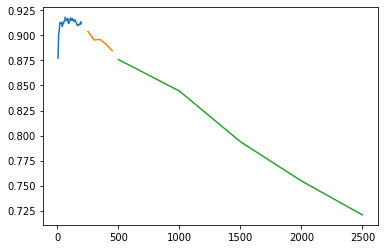

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def print_values_for_n_neighbors(n, matrix=False):
    training = ds.training.sample(frac=1, random_state=9)
    testing = ds.testing.sample(frac=1, random_state=9)
    kneighbors = KNeighborsClassifier(n_neighbors=n)
    vectorizer = TfidfVectorizer()
    X_training = vectorizer.fit_transform(training["review_text"], training["domain"])
    X_testing = vectorizer.transform(testing["review_text"])
    kneighbors.fit(X_training, training["domain"])
    if not matrix:
        return print_values(testing["domain"], kneighbors.predict(X_testing))
    else:
        print_values(testing["domain"], kneighbors.predict(X_testing))
        return confusion_matrix(testing["domain"], kneighbors.predict(X_testing), labels=testing["domain"].unique())

best_values = [0, 0, 0, None]
best_n = 0

def run_multiple_n_neighbors(range_: range):
    global best_values, best_n
    f_scores = []
    for i in range_:
        print("Number of neighbours:", i)
        values = print_values_for_n_neighbors(i)
        f_scores.append(values[2])
        if values[2] > best_values[2]:
            best_values = values
            best_n = i
    plt.plot(range_, f_scores)

run_multiple_n_neighbors(range(5, 200, 5))
run_multiple_n_neighbors(range(250, 500, 50))
run_multiple_n_neighbors(range(500, 3000, 500))
plt.show()

From the plot outputted here, we can see that the best range for the number of neighbors is between 10 and 200.
Hereunder are the best results during this run:

In [38]:
print("\nBest number of neighbors:", best_n)
print("Best values:\n", best_values)


Best number of neighbors: 65
Best values:
 (0.921654624314152, 0.9181250000000001, 0.9181279246186587, None)


Macro averages for K-Neigbours classifier with K = 65
			Precision: 0.921654624	Recall: 0.918125000	F-Score: 0.918127925
Confusion matrix of K-Neighbours with K = 65


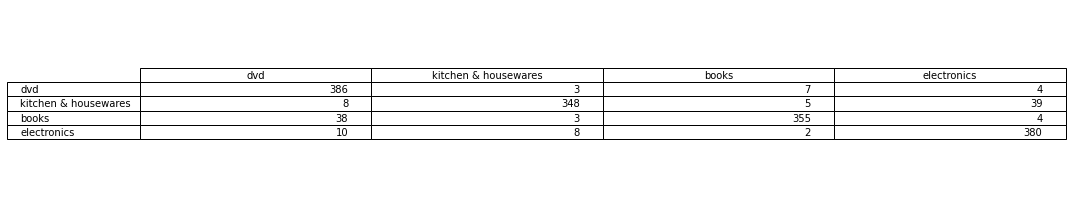

In [39]:
training = ds.training.sample(frac=1, random_state=9)
testing = ds.testing.sample(frac=1, random_state=9)
kneighbors = KNeighborsClassifier(n_neighbors=best_n)
vectorizer = TfidfVectorizer()
X_training = vectorizer.fit_transform(training["review_text"], training["domain"])
X_testing = vectorizer.transform(testing["review_text"])
kneighbors.fit(X_training, training["domain"])
print("Macro averages for K-Neigbours classifier with K =", best_n)
matrix = print_values_for_n_neighbors(65, matrix=True)


fig, ax = plt.subplots()
fig.set_size_inches(15, 3)
# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(matrix, loc="center", colLabels=testing["domain"].unique(), rowLabels=testing["domain"].unique(), colLoc="center")
fig.tight_layout()
print("Confusion matrix of K-Neighbours with K =", best_n)
plt.show()

#### Books

In [40]:
perceptron_calc('books', 100)
perceptron_calc('books', 1000)
perceptron_calc('books', 10000)
perceptron_calc('books', 100000)
perceptron_calc('books', 1000000)
perceptron_calc('books', 10000000)
perceptron_calc('books', 100000000)
perceptron_calc('books', 1000000000)

			Precision: 0.755208333	Recall: 0.754825483	F-Score: 0.754846779
			Precision: 0.755208333	Recall: 0.754825483	F-Score: 0.754846779
			Precision: 0.755208333	Recall: 0.754825483	F-Score: 0.754846779
			Precision: 0.755208333	Recall: 0.754825483	F-Score: 0.754846779
			Precision: 0.755208333	Recall: 0.754825483	F-Score: 0.754846779
			Precision: 0.755208333	Recall: 0.754825483	F-Score: 0.754846779
			Precision: 0.755208333	Recall: 0.754825483	F-Score: 0.754846779
			Precision: 0.755208333	Recall: 0.754825483	F-Score: 0.754846779


#### DVD

In [41]:
perceptron_calc('dvd')

			Precision: 0.782396854	Recall: 0.782078871	F-Score: 0.782193710


#### Electronics

In [42]:
perceptron_calc('electronics')

			Precision: 0.773718963	Recall: 0.774104337	F-Score: 0.773892071


#### Kitchen And Housewares

In [43]:
perceptron_calc('kitchen & housewares')


			Precision: 0.791982679	Recall: 0.792355890	F-Score: 0.792124525


### Naive Bayes

In [44]:
from sklearn.naive_bayes import GaussianNB
vec_nb = TfidfVectorizer(lowercase=True, analyzer="word")
nb_train_data = vec_nb.transform(ds.training['review_text'])
nb_train_result = ds.training['rating_str']
books_nb_test = vec_nb.transform(ds.testing_by_domain['books']['review_text'])


gnb = GaussianNB()
pred = gnb.fit(nb_train_data, nb_train_result).predict(books_nb_test)
print(pred)


NotFittedError: The TF-IDF vectorizer is not fitted

### Decision Trees

In [47]:
from sklearn import tree
vec_dt = TfidfVectorizer(lowercase=True, analyzer="word", stop_words="english")
training_dt = vec_dt.fit_transform(ds.training["review_text"])
testing_dt = vec_dt.transform(ds.testing["review_text"])
clf = tree.DecisionTreeClassifier()
clf.fit(training_dt, ds.training["polarity"]).score(testing_dt, ds.testing["polarity"])
print(s.format(*precision_recall_fscore_support(ds.testing["polarity"], clf.predict(testing_dt), average="macro")))

			Precision: 0.665010414	Recall: 0.665053741	F-Score: 0.664981155


- max_depth: number of tree's nodes the higher the value, the higher and closer values are
    - the higher the value, the higher and closer values are
-

### Support Vector Machines

In [49]:
from sklearn import svm
vec_svm = TfidfVectorizer(lowercase=True, analyzer="word")
training_svm = vec_svm.fit_transform(ds.training["review_text"])
testing_svm = vec_svm.transform(ds.testing["review_text"])
clf = svm.SVC()
clf.fit(training_svm, ds.training["polarity"])
clf.score(testing_svm, ds.testing["polarity"])
print(s.format(*precision_recall_fscore_support(ds.testing["polarity"], clf.predict(testing_svm), average="macro")))

			Precision: 0.817448299	Recall: 0.817472114	F-Score: 0.817458928
